In [2]:
import numpy as np
import pandas as pd
import re
%matplotlib inline

In [3]:
dat = pd.read_csv('Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv')

In [4]:
dat.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [ ]:
def get_vals(x):
    state = x[5]
    covered = x[9]
    total = x[10]
    medicare = x[11]
    

In [10]:
dat.columns = [u'DRG Definition', u'Provider Id', u'Provider Name',
       u'Provider Street Address', u'Provider City', u'Provider State',
       u'Provider Zip Code', u'Hospital Referral Region Description',
       u'Total Discharges', u'Average Covered Charges',
       u'Average Total Payments', u'Average Medicare Payments']

In [22]:
sub = dat[['Provider State', 'Average Covered Charges', 'Average Total Payments', 'Average Medicare Payments']]
sub['Average Covered Charges'] = sub['Average Covered Charges'].apply(lambda x: x[1:])
sub['Average Total Payments'] = sub['Average Total Payments'].apply(lambda x: x[1:])
sub['Average Medicare Payments'] = sub['Average Medicare Payments'].apply(lambda x: x[1:])
sub['Average Covered Charges'] = sub['Average Covered Charges'].astype(float)
sub['Average Total Payments'] = sub['Average Total Payments'].astype(float)
sub['Average Medicare Payments'] = sub['Average Medicare Payments'].astype(float)
sub.head()

/Users/kirkhunter/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/kirkhunter/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/kirkhunter/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

,Provider State,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,AL,32963.07,5777.24,4763.73
1,AL,15131.85,5787.57,4976.71
2,AL,37560.37,5434.95,4453.79
3,AL,13998.28,5417.56,4129.16
4,AL,31633.27,5658.33,4851.44


In [106]:
minsub = sub[['Average Covered Charges']].groupby(sub['Provider State']).apply(min)
minsub.columns = ['min_average_covered_charges']
maxsub = sub[['Average Covered Charges']].groupby(sub['Provider State']).apply(max)
maxsub.columns = ['max_average_covered_charges']
medsub = sub['Average Covered Charges'].groupby(sub['Provider State']).apply(np.median).to_frame()
medsub.columns = ['med_average_covered_charges']
joined = minsub.join([maxsub, medsub])
joined = joined.reset_index()
joined.columns = ["prov_state", "min_average_covered_charges", "max_average_covered_charges", "med_average_covered_charges"]
joined['provider_state'] = joined['prov_state'].apply(lambda x: us_state_names[x])
joined = joined[["provider_state", "min_average_covered_charges", "max_average_covered_charges", "med_average_covered_charges"]]
joined.head()

,provider_state,min_average_covered_charges,max_average_covered_charges,med_average_covered_charges
0,Alaska,4758.84,190709.90,31073.18
1,Alabama,2536.69,459985.27,21620.27
2,Arkansas,2956.50,333470.45,19270.63
3,Arizona,4585.50,285720.46,30215.73
4,California,6833.53,929118.90,49465.09


In [100]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

us_state_names = {v: k for k,v in us_state_abbrev.iteritems()}

In [101]:
us_state_names

{'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming

In [93]:

for row in joined.iterrows():
    state  = row[1]["Provider State"]
    mincov = round(row[1]["min_average_covered_charges"] / 1000.)
    maxcov = round(row[1]["max_average_covered_charges"] / 1000.)
    medcov = round(row[1]["med_average_covered_charges"] / 1000.)
    item = {"State": state, "freq": { "low": mincov, "mid": medcov, "high": maxcov } }
    print item

{'State': 'AK', 'freq': {'high': 191.0, 'low': 5.0, 'mid': 31.0}}
{'State': 'AL', 'freq': {'high': 460.0, 'low': 3.0, 'mid': 22.0}}
{'State': 'AR', 'freq': {'high': 333.0, 'low': 3.0, 'mid': 19.0}}
{'State': 'AZ', 'freq': {'high': 286.0, 'low': 5.0, 'mid': 30.0}}
{'State': 'CA', 'freq': {'high': 929.0, 'low': 7.0, 'mid': 49.0}}
{'State': 'CO', 'freq': {'high': 290.0, 'low': 5.0, 'mid': 30.0}}
{'State': 'CT', 'freq': {'high': 254.0, 'low': 4.0, 'mid': 23.0}}
{'State': 'DC', 'freq': {'high': 254.0, 'low': 6.0, 'mid': 28.0}}
{'State': 'DE', 'freq': {'high': 140.0, 'low': 9.0, 'mid': 20.0}}
{'State': 'FL', 'freq': {'high': 399.0, 'low': 5.0, 'mid': 35.0}}
{'State': 'GA', 'freq': {'high': 342.0, 'low': 4.0, 'mid': 22.0}}
{'State': 'HI', 'freq': {'high': 200.0, 'low': 8.0, 'mid': 25.0}}
{'State': 'IA', 'freq': {'high': 133.0, 'low': 6.0, 'mid': 18.0}}
{'State': 'ID', 'freq': {'high': 157.0, 'low': 6.0, 'mid': 19.0}}
{'State': 'IL', 'freq': {'high': 303.0, 'low': 4.0, 'mid': 26.0}}
{'State': 

In [90]:
s = 5.2543254325
print round(s, 2)

5.25


In [107]:
joined.to_csv('health.csv', index=False)

In [108]:
joined.columns

Index([u'provider_state', u'min_average_covered_charges',
       u'max_average_covered_charges', u'med_average_covered_charges'],
      dtype='object')

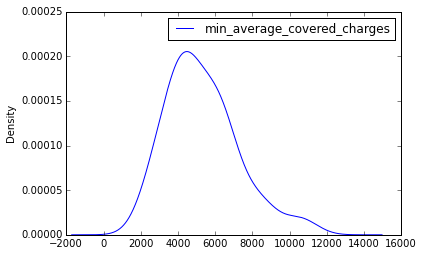

In [109]:
joined[['min_average_covered_charges']].plot(kind='density')

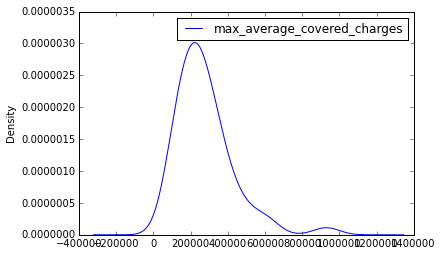

In [110]:
joined[['max_average_covered_charges']].plot(kind='density')

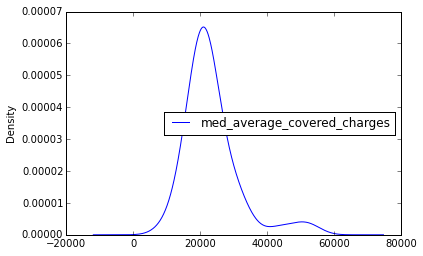

In [111]:
joined[['med_average_covered_charges']].plot(kind='density')

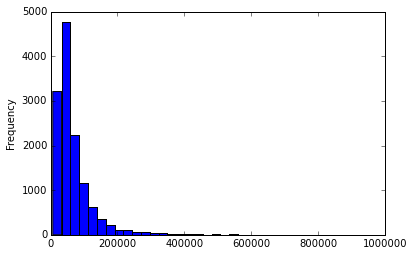

In [121]:
sub.loc[sub["Provider State"]=='CA']['Average Covered Charges'].plot(kind='hist', bins=35)